In [1]:
!pip install tensorflow


In [2]:
from tensorflow.keras.applications import VGG19


2025-05-23 15:44:03.998319: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-23 15:44:04.004406: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-23 15:44:04.056005: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-23 15:44:04.105359: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748015044.150636    4805 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748015044.16

In [3]:

from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Rescaling
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import Precision, Recall

In [4]:
train_datagen = ImageDataGenerator( 
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    "/home/aisssata/Documents/ICRISAT/groundnut-leaf-diseases/image_plant/train",
    
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


validation_set = valid_datagen.flow_from_directory( 
    "/home/aisssata/Documents/ICRISAT/groundnut-leaf-diseases/image_plant/val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1204 images belonging to 5 classes.
Found 344 images belonging to 5 classes.


In [9]:
# Useful for getting the number of classes
folders = glob('/home/aisssata/Documents/ICRISAT/groundnut-leaf-diseases/image_plant/train/*')


NameError: name 'glob' is not defined

In [5]:

from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import os

# Exemple : chemin vers le dossier contenant les dossiers de classes
train_path = '/home/aisssata/Documents/ICRISAT/groundnut-leaf-diseases/image_plant/train'
folders = os.listdir(train_path)

# Supposons que tu as un modèle VGG chargé, par exemple :
from tensorflow.keras.applications import VGG19
vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)

x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

# Compiler le modèle
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),  # Utilisez l'objet Adam pour configurer le taux d'apprentissage
    metrics=['accuracy']
)


# Print the model summary
model.summary()


2025-05-23 15:44:17.571255: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │       125,445 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,149,829 (76.87 MB)

 Trainable params: 20,149,829 (76.87 MB)

 Non-trainable params: 0 (0.00 B)

##compile the model

In [6]:
r = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(validation_set)
)


/home/aisssata/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 928s 25s/step - accuracy: 0.3100 - loss: 1.5385 - val_accuracy: 0.5814 - val_loss: 1.0908
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 827s 22s/step - accuracy: 0.5742 - loss: 1.0428 - val_accuracy: 0.6977 - val_loss: 0.7288
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 822s 22s/step - accuracy: 0.7535 - loss: 0.5977 - val_accuracy: 0.8227 - val_loss: 0.4364
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 818s 22s/step - accuracy: 0.8577 - loss: 0.3942 - val_accuracy: 0.8837 - val_loss: 0.3288
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 816s 21s/step - accuracy: 0.9195 - loss: 0.2733 - val_accuracy: 0.9419 - val_loss: 0.1937
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 813s 21s/step - accuracy: 0.9619 - loss: 0.1332 - val_accuracy: 0.9448 - val_loss: 0.1764
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 818s 22s/step - accuracy: 0.9318 - loss: 0.2059 - val_accuracy: 0.9360 - val_loss: 0.2016
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 825s 22s/step - accuracy: 0.9574 - loss: 0.1251 - val_accuracy: 0.

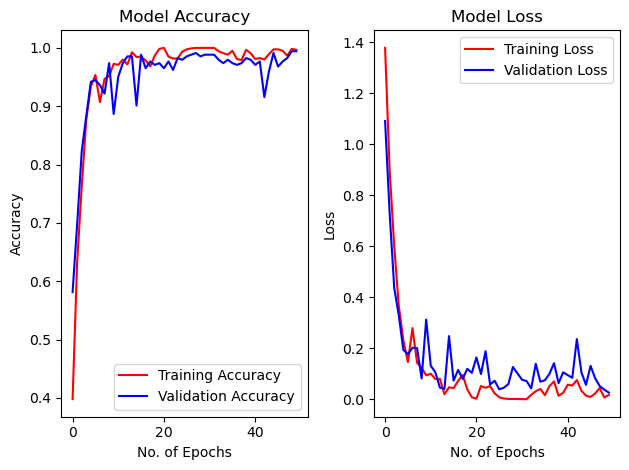

In [21]:
# Tracé de l'accuracy
plt.subplot(1, 2, 1)
plt.plot(r.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(r.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()

# Tracé de la loss
plt.subplot(1, 2, 2)
plt.plot(r.history['loss'], color='red', label='Training Loss')
plt.plot(r.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()
plt.savefig("VGG19.jpeg")  # Save before showing
plt.tight_layout()
plt.show()


In [7]:
train_path = "/home/aisssata/Documents/ICRISAT/groundnut-leaf-diseases/image_plant/train"
valid_path = "/home/aisssata/Documents/ICRISAT/groundnut-leaf-diseases/image_plant/val"


Data augmentation and preprocessing

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation datasets
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_set = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1204 images belonging to 5 classes.
Found 344 images belonging to 5 classes.


Train the model

In [14]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/home/aisssata/Documents/ICRISAT/groundnut-leaf-diseases/image_plant/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#rescale_layer = Rescaling(1./255)
#test_set = test_set.map(lambda x, y: (rescale_layer(x), y))


Found 172 files belonging to 5 classes.


In [10]:
# Évaluer le modèle
test_loss, test_acc = model.evaluate(test_set)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')


6/6 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.9525 - loss: 0.2167
Test Loss: 0.1562
Test Accuracy: 0.9477


In [15]:
class_name = test_set.class_names
class_name

['ALTERNARIA LEAF SPOT',
 'HEALTHY',
 'LEAF SPOT (EARLY AND LATE)',
 'ROSETTE',
 'RUST']

In [16]:
y_pred = model.predict(test_set)
Y_pred = tf.argmax(y_pred, axis=1)
Y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 29s 5s/step


<tf.Tensor: shape=(172,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])>

In [17]:
import tensorflow as tf
true_categories = tf.concat([y for _, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
Y_true


2025-05-24 12:09:52.739348: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(172,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])>

In [18]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred,target_names=class_name))

                            precision    recall  f1-score   support

      ALTERNARIA LEAF SPOT       0.90      1.00      0.95        45
                   HEALTHY       1.00      0.97      0.98        60
LEAF SPOT (EARLY AND LATE)       0.98      0.91      0.94        45
                   ROSETTE       1.00      0.90      0.95        10
                      RUST       0.92      1.00      0.96        12

                  accuracy                           0.96       172
                 macro avg       0.96      0.96      0.96       172
              weighted avg       0.96      0.96      0.96       172



In [23]:
cm


array([[42,  1,  2,  0,  0],
       [ 0, 59,  1,  0,  0],
       [ 3,  2, 40,  0,  0],
       [ 0,  2,  0,  8,  0],
       [ 0,  0,  0,  0, 12]])

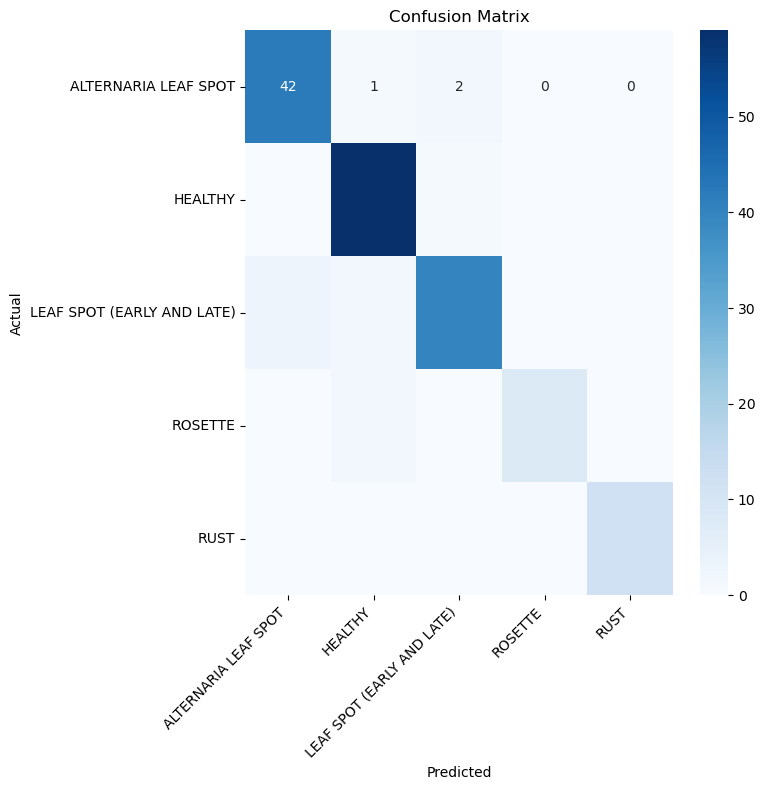

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define class names
class_names = [
    "ALTERNARIA LEAF SPOT",
    "HEALTHY",
    "LEAF SPOT (EARLY AND LATE)",
    "ROSETTE",
    "RUST"
]

# Your confusion matrix values
cm = np.array([
    [42,  1,  2, 0, 0],
    [ 0, 59,  1, 0, 0],
    [ 3,  2, 40, 0, 0],
    [ 0,  2,  0, 8, 0],
    [ 0,  0,  0, 0, 12]
])

# Plot
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Save the figure
plt.savefig("confusion_matrix vgg19.png", dpi=300)  # You can change the path and dpi as needed
plt.show()
